In [8]:
%reload_ext autoreload

# !pip install stochastic
import os
import sys
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.simplefilter(action='ignore', category=FutureWarning)


sys.path.append(os.path.dirname(os.path.abspath('')))

from environments import TradingEnvironment
from exchanges.simulated import SimulatedExchange
from actions import DiscreteActionStrategy
from rewards import SimpleProfitStrategy
import matplotlib.pyplot as plt

def get_date(symbol):
    df = pd.read_parquet(f"/data/stocks/{symbol}_1min.parquet.gzip")
    df['date'] = pd.to_datetime(df['date']).astype(int)/ 10**9
    return df



ModuleNotFoundError: No module named 'exchanges.simulated.gan_exchange'

In [ ]:
import pandas as pd
df = get_date("ABB")

df.index += 1
exchange = SimulatedExchange(data_frame=df)
action_strategy = DiscreteActionStrategy()
reward_strategy = SimpleProfitStrategy()

env = TradingEnvironment(exchange=exchange,
                         action_strategy=action_strategy,
                         reward_strategy=reward_strategy)

obs = env.reset()
sell_price = 1e9
stop_price = -1

print('Initial portfolio: ', exchange.portfolio)
results = []
for i in range(1000):
    action = 0 if obs['close'] < sell_price else 18
    action = 19 if obs['close'] < stop_price else action
    
    if i == 0 or portfolio['BTC'] == 0:
        action = 16
        sell_price = obs['close'] + (obs['close'] / 50)
        stop_price = obs['close'] - (obs['close'] / 50)
    
    obs, reward, done, info = env.step(action)
    executed_trade = info['executed_trade']
    filled_trade = info['filled_trade']
    portfolio = exchange.portfolio
#     print(portfolio)
    results.append({
        'reward': reward,
        'trade_type':executed_trade.trade_type,
        'executed_trade.price': executed_trade.price,
        'executed_trade.amount':executed_trade.amount,
        'filled_trade.trade_type': filled_trade.trade_type,
        'filled_trade.price': filled_trade.price,
        'filled_trade.amount':filled_trade.amount,
        'portfolio':portfolio
        
    })
#     print('Obs: ', obs)
#     print('Reward: ', reward)
#     print('Portfolio: ', portfolio)

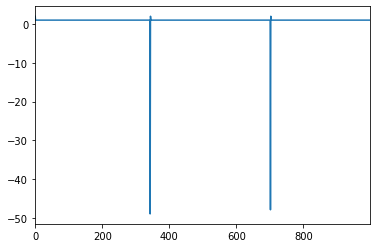

In [40]:
result = pd.DataFrame(results)
# result['executed_trade.amount'].plot()
result['reward'].plot()
plt.show()